#  About The Dataset
 **RowNumber**: corresponds to the record (row) number and has no effect on the output.

**CustomerId**: contains random values and has no effect on customer leaving the bank.

**Surname**: the surname of a customer has no impact on their decision to leave the bank.

**CreditScore**: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography**: a customer’s location can affect their decision to leave the bank.

**Gender**: it’s interesting to explore whether gender plays a role in a customer leaving the bank.

**Age**: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure**: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance**: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts**: refers to the number of products that a customer has purchased through the bank.

**HasCrCard**: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

**IsActiveMember**: active customers are less likely to leave the bank.

**EstimatedSalary**: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited**: Indicates whether the customer has exited the bank or not (0=No,1=Yes)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Churn_Modelling.csv")

Saving Churn_Modelling.csv to Churn_Modelling (3).csv


In [ ]:
# prompt: df.head(10)

df.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.shape

(10000, 14)

**getting information about dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


***checking null values***

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**getting overall ststistics about dataset**

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.duplicated().sum()

0

# **UNIVARIATE DATA ANALYSIS**

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
# Customer who left the bank
Churn=df[df['Exited']==1]
Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [ ]:
# Customer who didn't leave the bank
non_Churn=df[df['Exited']==0]
non_Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


# **HISTOGRAM**

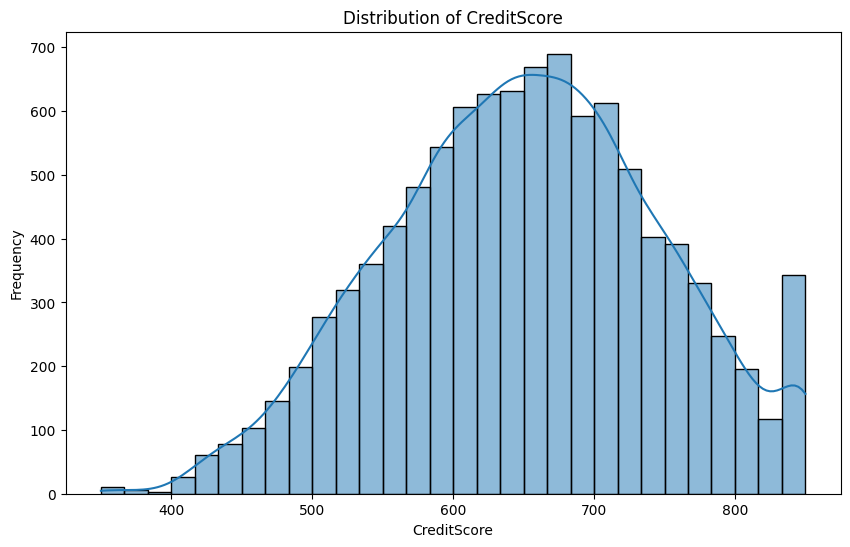

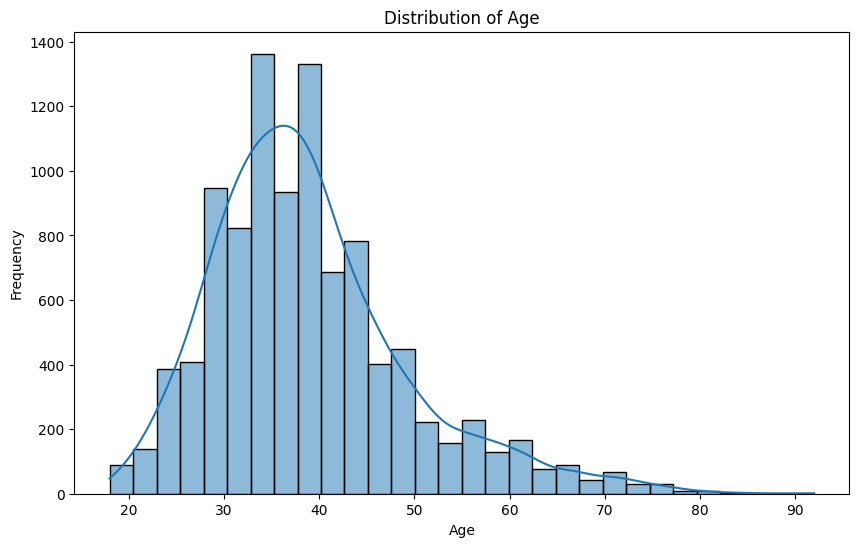

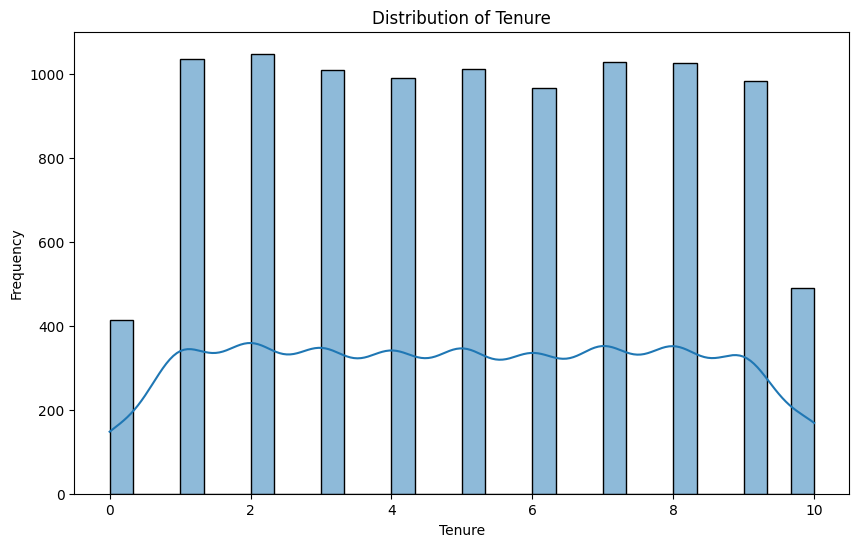

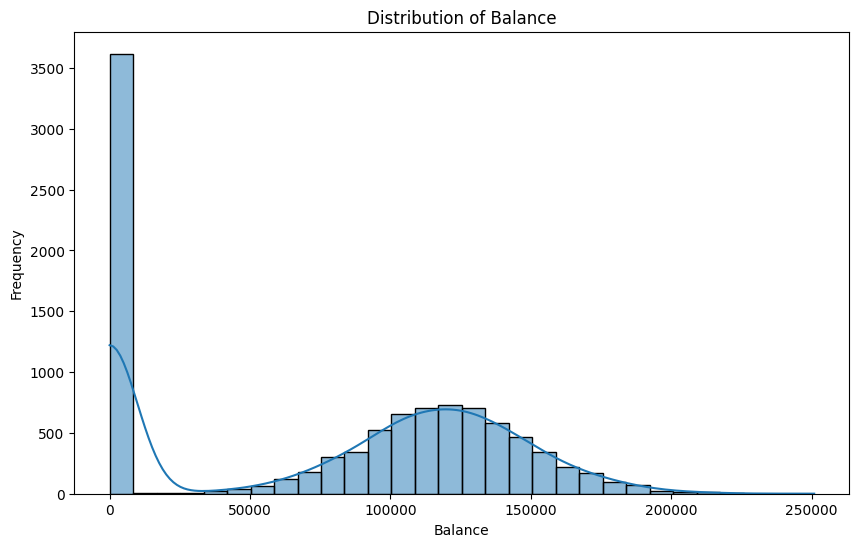

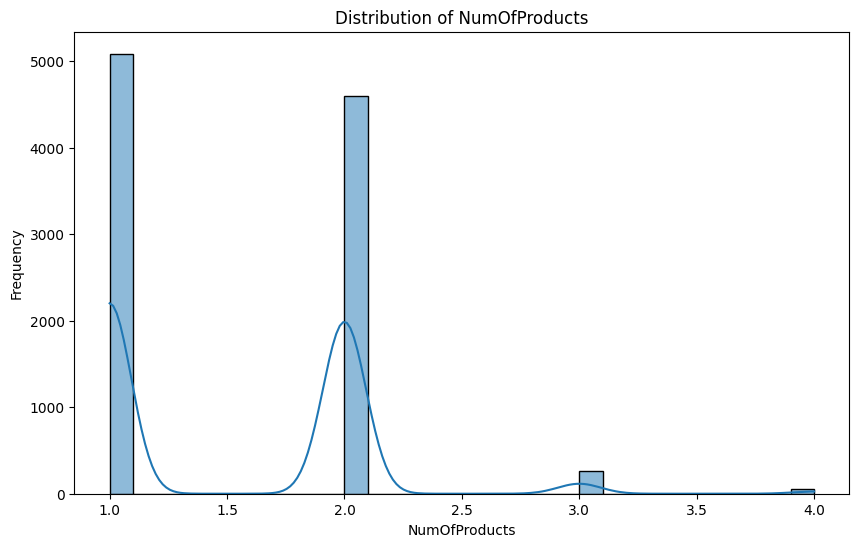

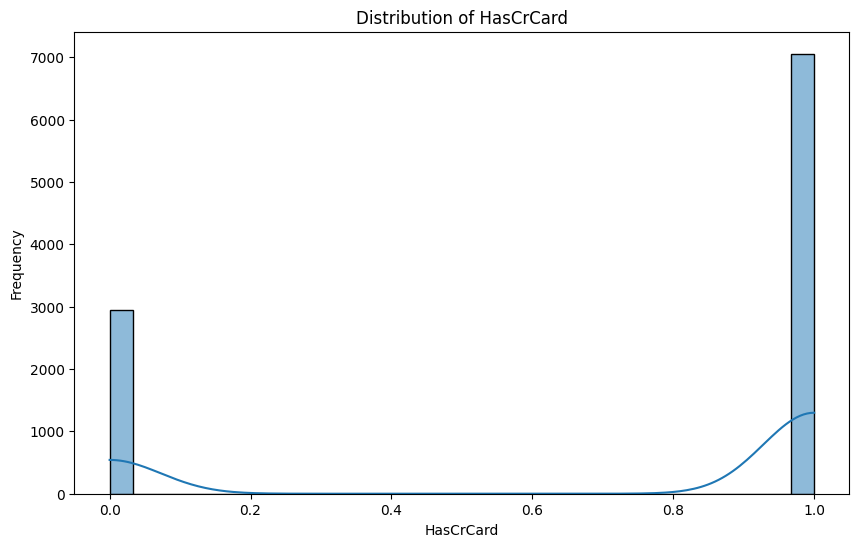

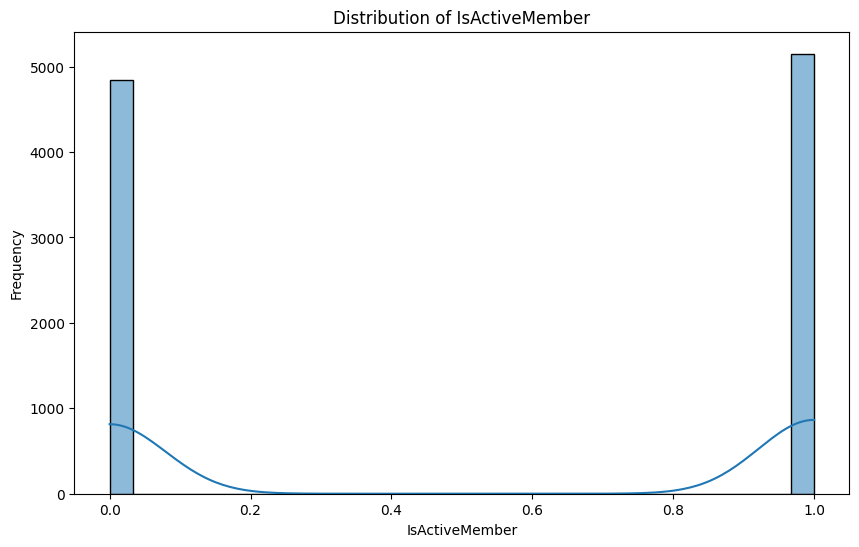

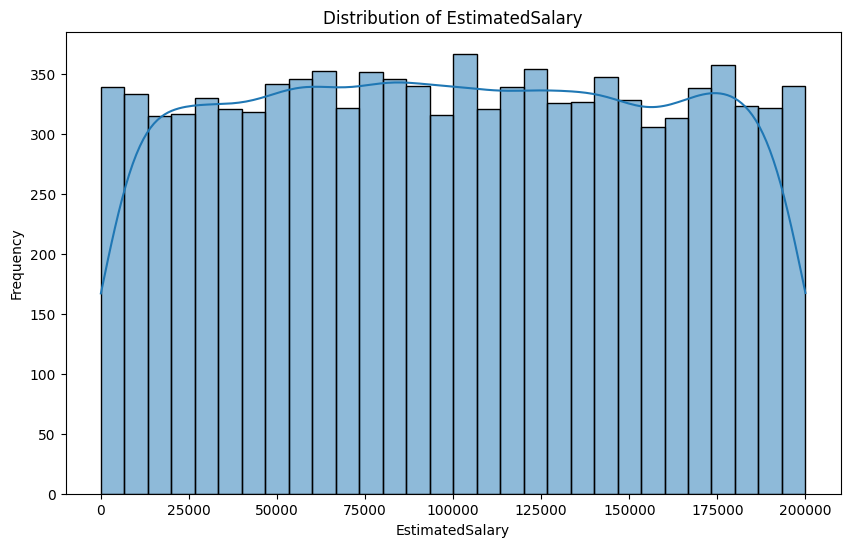

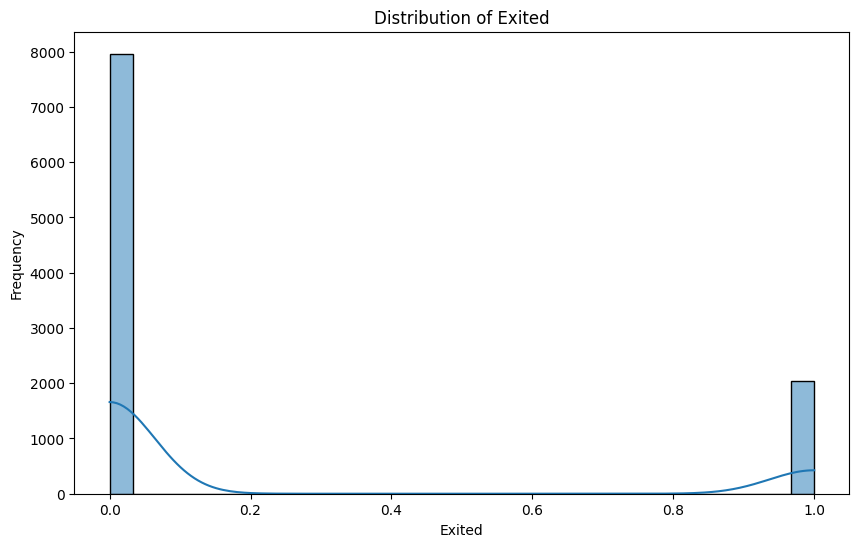

In [ ]:
for column in numerical_columns[2:]:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# ***Box Plots***

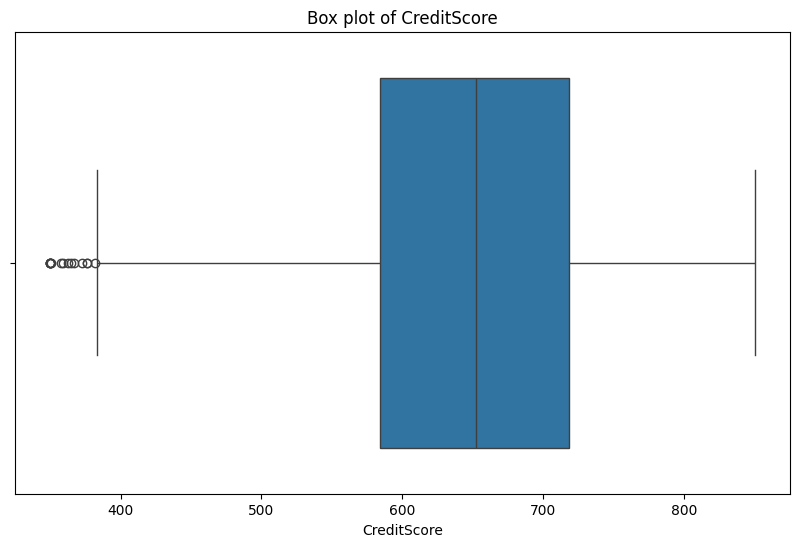

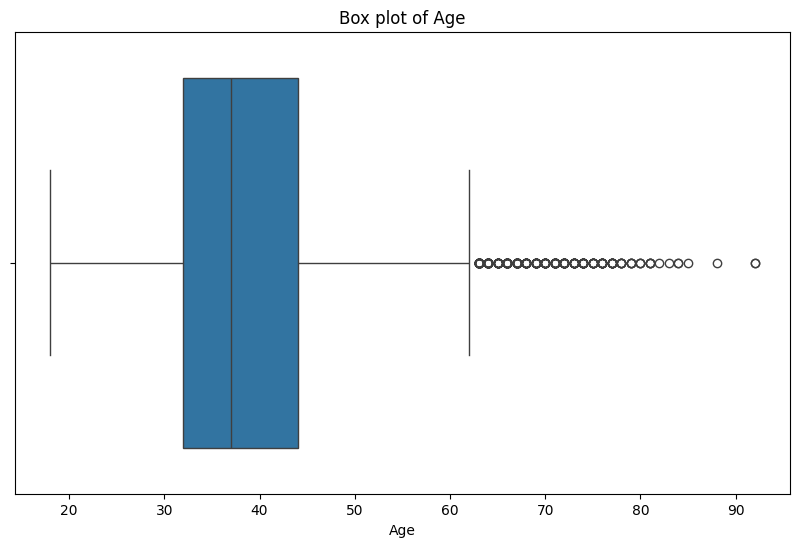

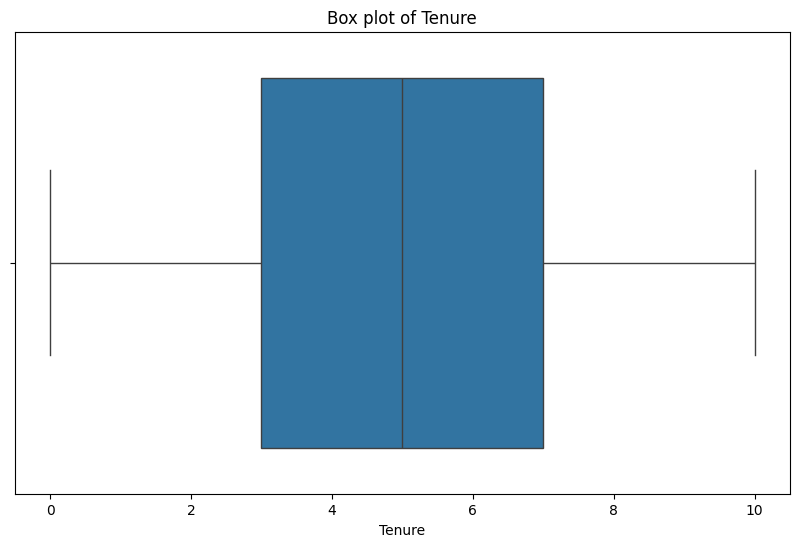

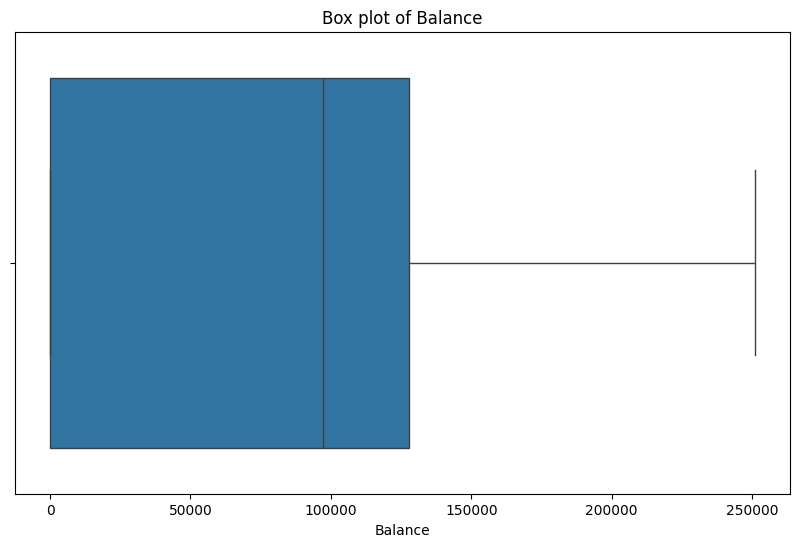

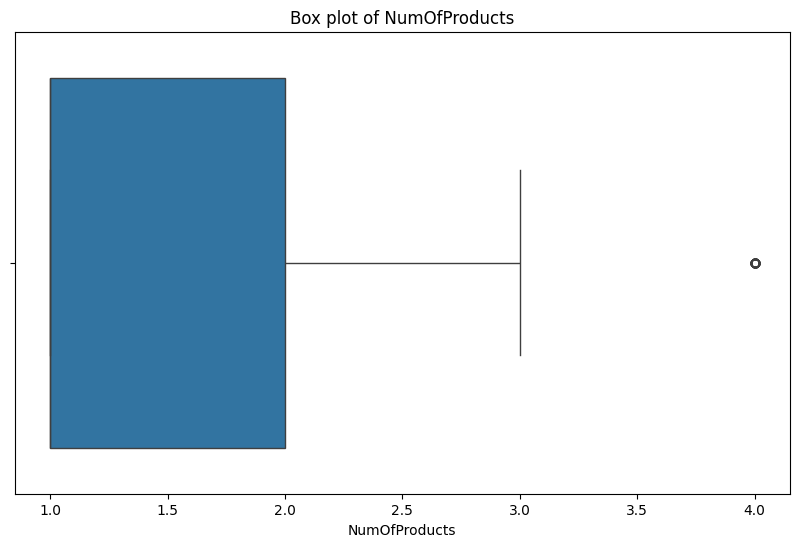

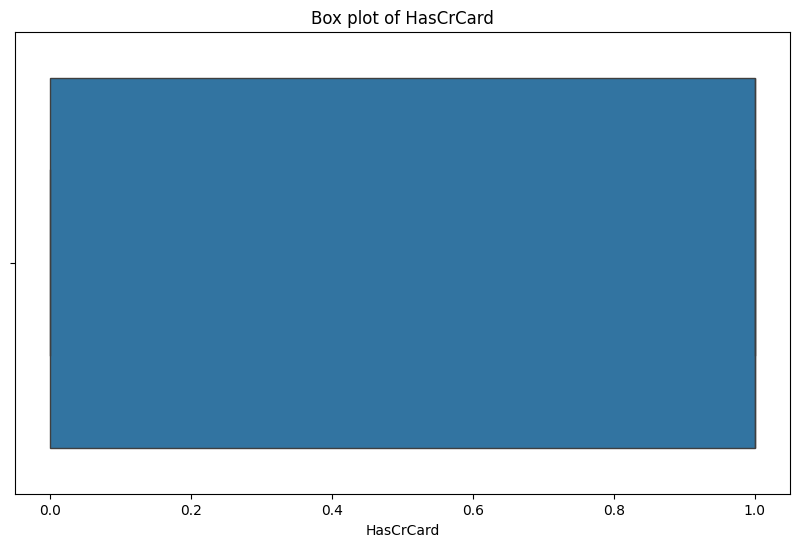

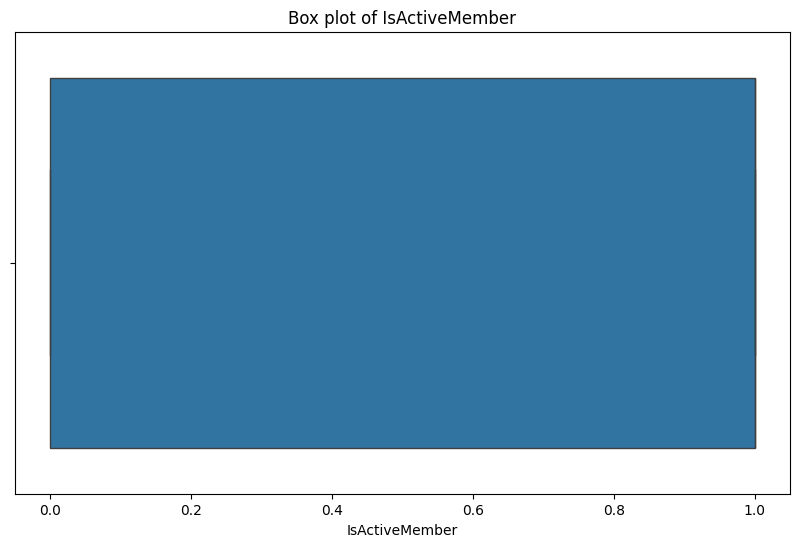

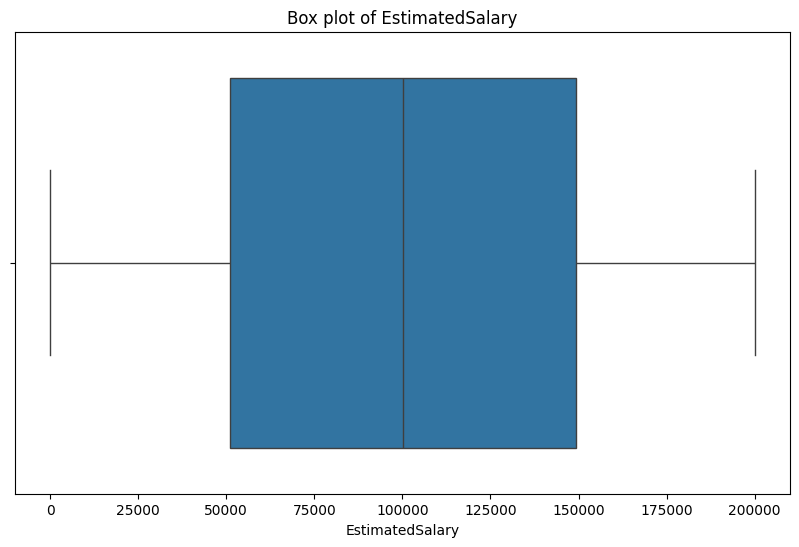

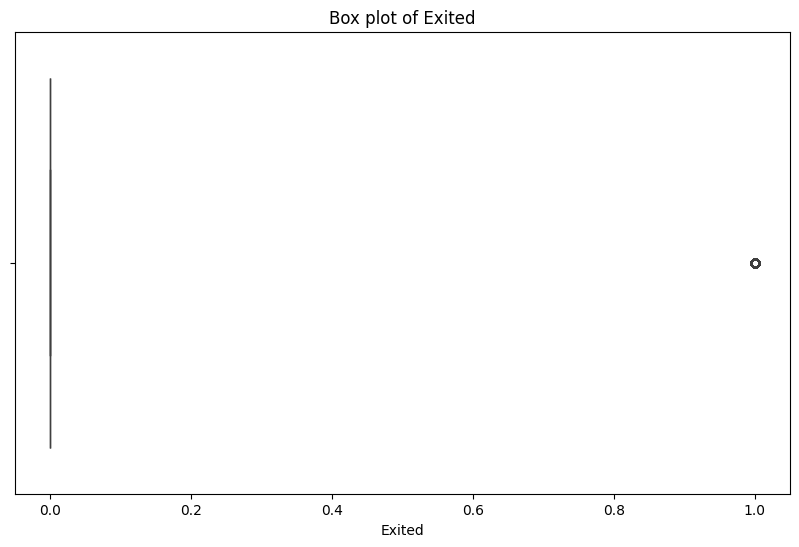

In [ ]:
for column in numerical_columns[2:]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# **Analyze Categorical Features**

In [ ]:

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f'Value counts for {column}:')
    print(df[column].value_counts())

Value counts for Surname:
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
Value counts for Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Value counts for Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64


# **BOX PLOT**

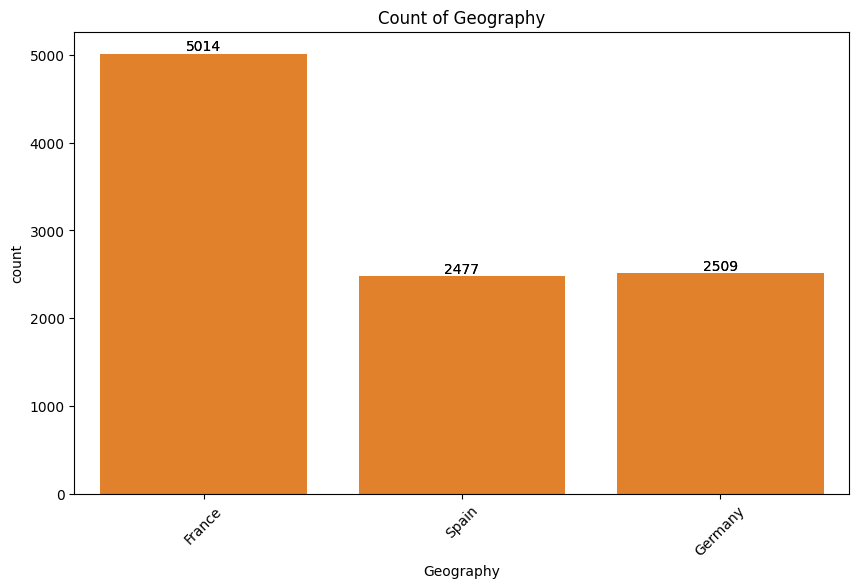

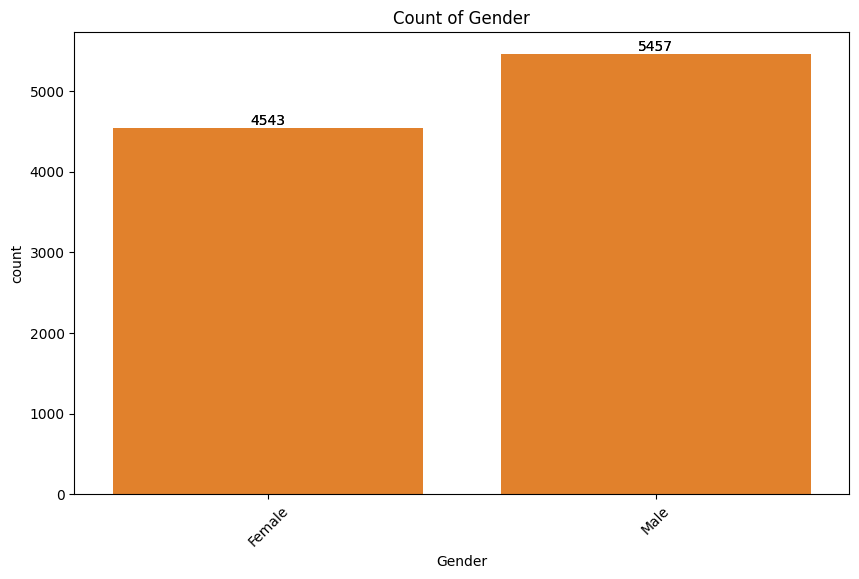

In [ ]:
for column in categorical_columns[1:]: # removing 1st column
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=df[column])
    sns.countplot(x=df[column])
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
    # Annotate counts on the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)
    plt.show()

# **PIE CHART**

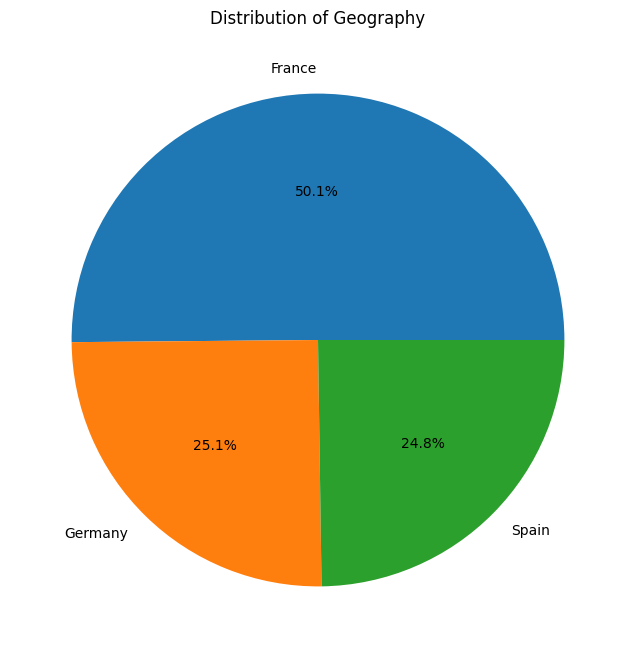

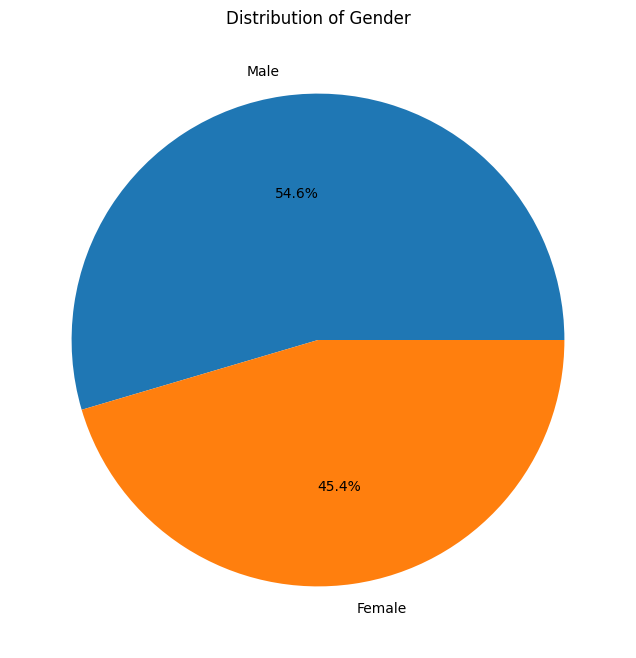

In [ ]:
for column in categorical_columns[1:]:
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

# **BIVARIATE DATA ANALYSIS**

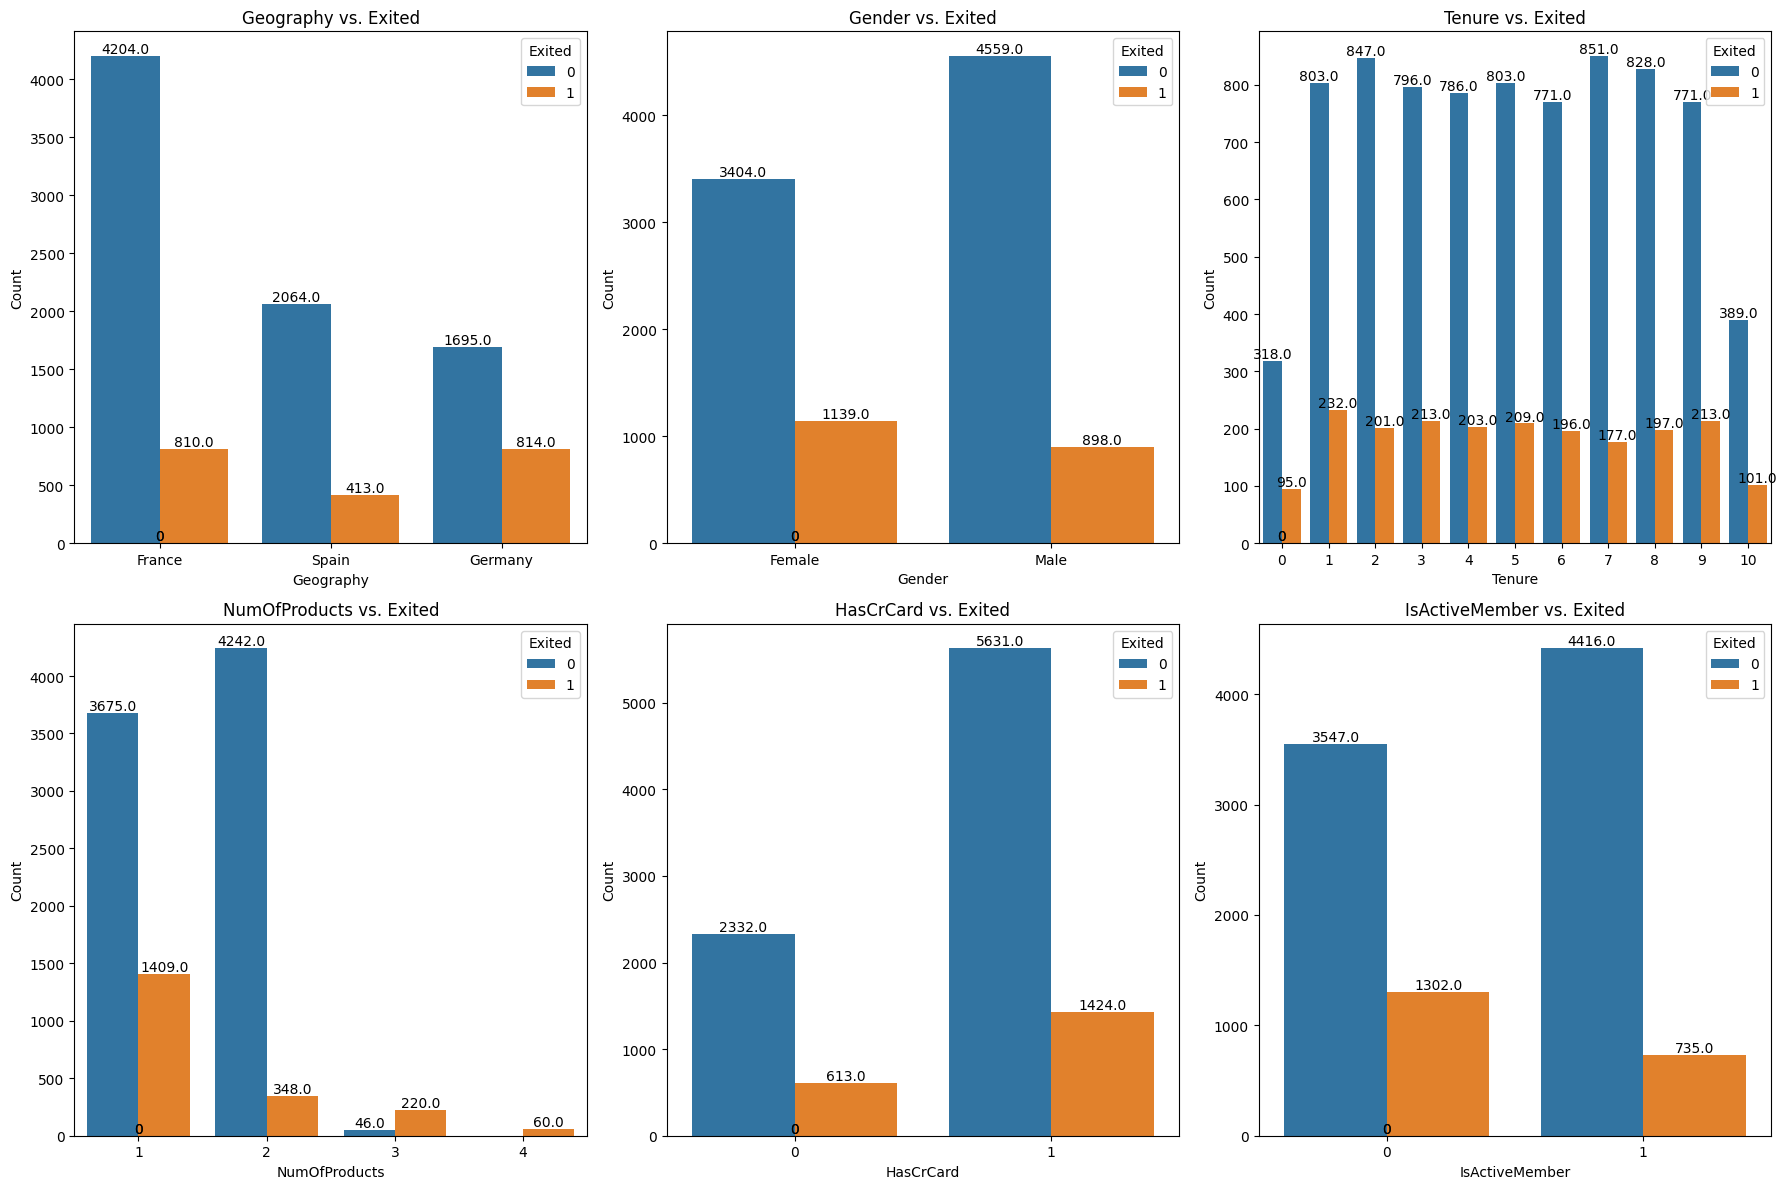

In [ ]:
features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for ax, feature in zip(axs.flatten(), features):
    sns.countplot(x=feature, hue='Exited', data=df, ax=ax)
    ax.set_title(f'{feature} vs. Exited')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

    # Add values on the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

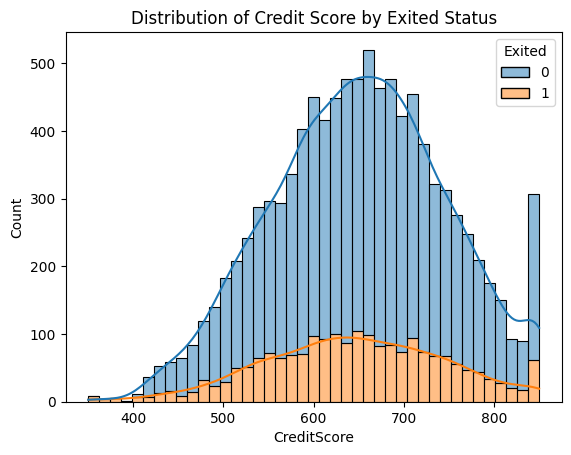

In [ ]:
sns.histplot(data=df, x='CreditScore', hue='Exited', multiple="stack", kde=True)
plt.title('Distribution of Credit Score by Exited Status')
plt.show()

In [ ]:
# prompt: df.columns()

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
# dropping irrelevant columns
df1=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Encoding Categorical Data**

In [ ]:
df1['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df1=pd.get_dummies(df1,drop_first=True).astype(int)

In [ ]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


**Not Handling Imbalanced**

In [ ]:
df1['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<ipython-input-214-20c31a215140>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df,palette=['green','red'])


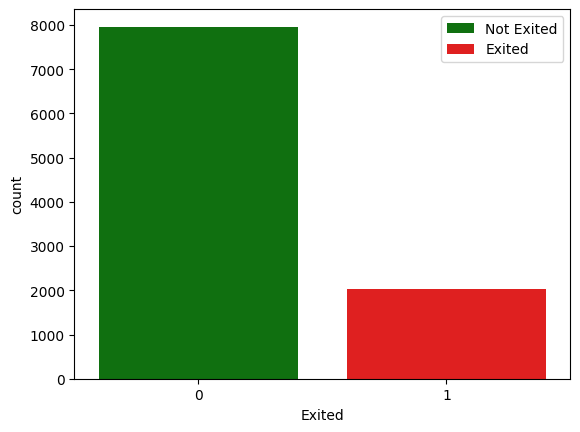

In [ ]:
sns.countplot(x='Exited', data=df,palette=['green','red'])
plt.ylabel('count')
plt.legend(['Not Exited', 'Exited'])
plt.show()

In [ ]:
df1.shape

(10000, 12)

In [ ]:
X=df1.drop(['Exited'],axis=1)
y=df1['Exited'] # Target varible

In [ ]:
from sklearn.model_selection import train_test_split

**Splittting dataset into the Training set and test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
X_train.shape,X_test.shape


((8000, 11), (2000, 11))

In [ ]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5702,585,36,7,0,2,1,0,94283,0,0,1
3667,525,33,4,131023,2,0,0,55072,1,0,1
1617,557,40,4,0,2,0,1,105433,0,1,0
5673,639,34,5,139393,2,0,0,33950,0,1,1
4272,640,34,3,77826,1,1,1,168544,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5768,674,36,2,154525,1,0,1,27468,0,0,1
833,634,37,3,111432,2,1,1,167032,1,0,1
9719,516,47,9,128298,1,0,0,149614,1,0,0
2776,689,39,7,0,2,0,0,14917,0,0,1


***Logistic Regression***

In [ ]:

from sklearn.linear_model import LogisticRegression

In [ ]:
# before scalling
Log = LogisticRegression()
Log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Before scaling
y_pred=Log.predict(X_test)

In [ ]:
# Before scaling
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7965

# **Feature Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [ ]:

# after scalling
Log=LogisticRegression()
Log.fit(X_train_scaled,y_train)


LogisticRegression()

In [ ]:
y_pred1=Log.predict(X_test_scaled)
y_pred1

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# after scalling accuracy_score
accuracy_score(y_test,y_pred1)

0.808

In [ ]:
# It is not good to use accuracy as a metric on imbalanced dataset

*** This is imbalance dataset.For imbalance dataset we have to check Precision,recall and F1 score***

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred1)

0.5891472868217055

In [ ]:
recall_score(y_test,y_pred1)

0.18673218673218672

In [ ]:
f1_score(y_test,y_pred1)

0.2835820895522388

In [ ]:
# Prediction Score is a useful measure of success of prediction when classes are very imbalanced

In [ ]:
# mathematically, precision_score(pc)=TP/(TP+FP) FP=FALSE(+ve),TP=TRUE(+ve)
# recall_score(rc)=TP/(TP+FN)  FN=FALSE(-ve)

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2=dt.predict(X_test)
y_pred2

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred2)

0.783

In [ ]:
precision_score(y_test,y_pred2)

0.4691075514874142

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3=rf.predict(X_test)
y_pred3

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred3)

0.863

In [ ]:
precision_score(y_test,y_pred3)

0.7759336099585062

**Handling Imbalance Data With SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [ ]:
pip install --upgrade scikit-learn xgboost


In [ ]:
import sklearn
import xgboost
print("Scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)


Scikit-learn version: 1.2.0
XGBoost version: 2.1.3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an XGBoost classifier with L1 and L2 regularization
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic",use_label_encoder=False,random_state=42)

# Train the classifier on your training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:10:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8515
Precision: 0.697841726618705
Recall: 0.47665847665847666
F1-Score: 0.5664233576642336


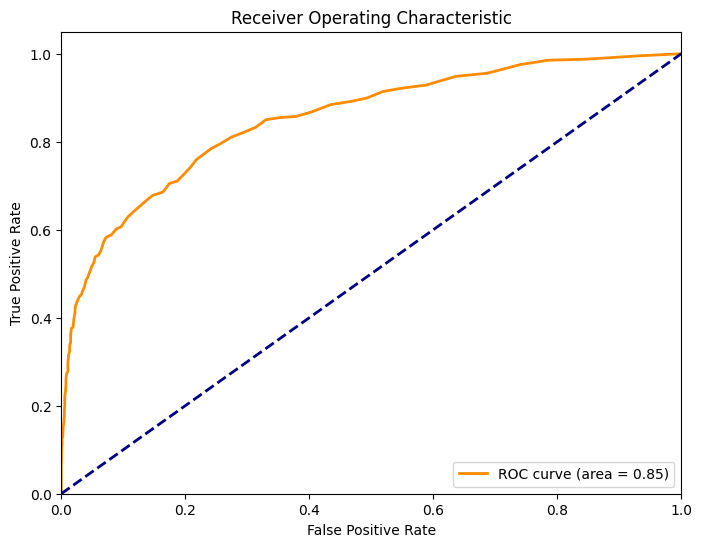

In [ ]:
   import matplotlib.pyplot as plt
   from sklearn.metrics import roc_curve, auc
   y_pred_proba = rf.predict_proba(X_test)[:, 1]
   fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
   roc_auc = auc(fpr, tpr)
   plt.figure(figsize=(8, 6))
   plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
   plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title('Receiver Operating Characteristic')
   plt.legend(loc="lower right")
   plt.show()

In [ ]:
y_res.value_counts()

,count
Exited,
1,7963
0,7963


**Splittting dataset into the Training set and test set after SMOTE**

In [ ]:
X_train_res, X_test_res, y_train_res, y_test_res= train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_train_res.shape

(12740, 11)

****

**Feature Scalling After SMOTE**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train_res)
X_test_scaled=sc.transform(X_test_res)

**Logistic Regression After applying SMOTE**

In [ ]:

from sklearn.linear_model import LogisticRegression
Log=LogisticRegression()
Log.fit(X_train_scaled,y_train_res)

LogisticRegression()

In [ ]:
y_pred1=Log.predict(X_test_scaled)
y_pred1

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_res,y_pred1)

0.785624607658506

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test_res,y_pred1)

0.771875

In [ ]:
recall_score(y_test_res,y_pred1)

0.7952350289761752

In [ ]:
f1_score(y_test_res,y_pred1)

0.7833809070726292

**Decision Tree Classifier after applying SMOTE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train_res,y_train_res)

DecisionTreeClassifier()

In [ ]:
y_pred2=dt.predict(X_test_res)
y_pred2

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
accuracy_score(y_test_res,y_pred2)

0.8041431261770244

In [ ]:
precision_score(y_test_res,y_pred2)

0.7837507635919365

**Random Forest classifier after applying SMOTE**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [ ]:
y_pred3=rf.predict(X_test_res)
y_pred3

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
accuracy_score(y_test_res,y_pred3)

0.8593848085373509

In [ ]:
precision_score(y_test_res,y_pred3)

0.8512396694214877

In [ ]:
f1_score(y_test_res,y_pred3)

0.8566858605246321

In [ ]:
recall_score(y_test_res,y_pred3)

0.8622021893110109

Applying XGBOOST

In [ ]:

import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Fit the classifier to your training data
xgb_classifier.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test_res)

# Calculate accuracy
accuracy = accuracy_score(y_test_res, y_pred_xgb)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_res, y_pred_xgb)
print("Precision:", precision)
# Calculate recall
from sklearn.metrics import recall_score
recall = recall_score(y_test_res, y_pred_xgb)
print("Recall:", recall)

Accuracy: 0.8587570621468926
Precision: 0.847511027095148
Recall: 0.8660656793303284


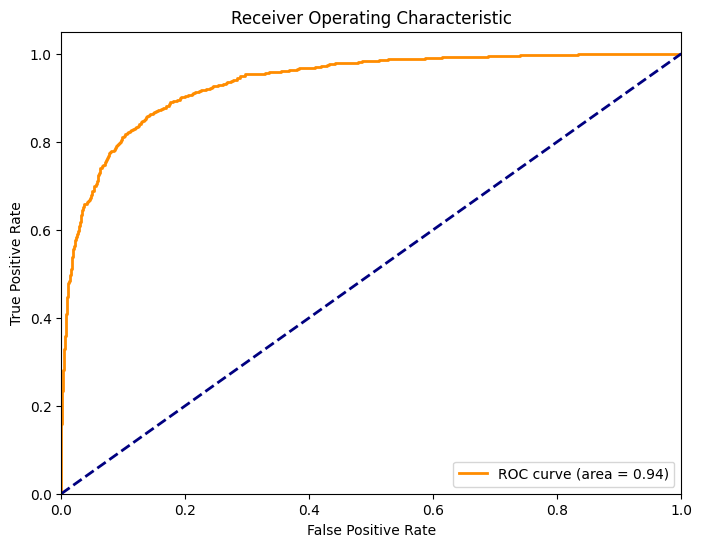

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Corrected import statement
import xgboost as xgb
y_pred_proba = xgb_classifier.predict_proba(X_test_res)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_res, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_test = xgb_classifier.predict(X_test_res.iloc[[100]])

# Print or store the predictions as neede
y_pred_test

array([0])

Applying Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score

# Create an AdaBoost classifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

# Fit the classifier to your training data
ada.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred_ada = ada.predict(X_test_res)

# Calculate accuracy
accuracy = accuracy_score(y_test_res, y_pred_ada)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_res, y_pred_ada)
print("Precision:", precision)

Accuracy: 0.8258003766478342
Precision: 0.8166243654822335


**Comparision of Models**

In [ ]:
final_data = pd.DataFrame({'Models': ['Log', 'Dt', 'rf', 'xgb'],
                         'Accuracy': [accuracy_score(y_test_res, y_pred1),
                                      accuracy_score(y_test_res, y_pred2),
                                      accuracy_score(y_test_res, y_pred3),
                                      accuracy_score(y_test_res, y_pred_xgb)],
                         'Precision': [precision_score(y_test_res, y_pred1),
                                       precision_score(y_test_res, y_pred2),
                                       precision_score(y_test_res, y_pred3),
                                       precision_score(y_test_res, y_pred_xgb)],
                         'recall': [recall_score(y_test_res, y_pred1),
                                   recall_score(y_test_res, y_pred2),
                                   recall_score(y_test_res, y_pred3),
                                   recall_score(y_test_res, y_pred_xgb)]})


In [ ]:
final_data

,Models,Accuracy,Precision,recall
0,Log,0.785625,0.771875,0.795235
1,Dt,0.804143,0.783751,0.826143
2,rf,0.859385,0.851240,0.862202
3,xgb,0.858757,0.847511,0.866066


<ipython-input-284-aa27a0dd0793>:2: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Models',y='Accuracy',data=final_data,hue='Models',palette=['violet', 'skyblue', 'red'],legend=False)


<Axes: xlabel='Models', ylabel='Accuracy'>

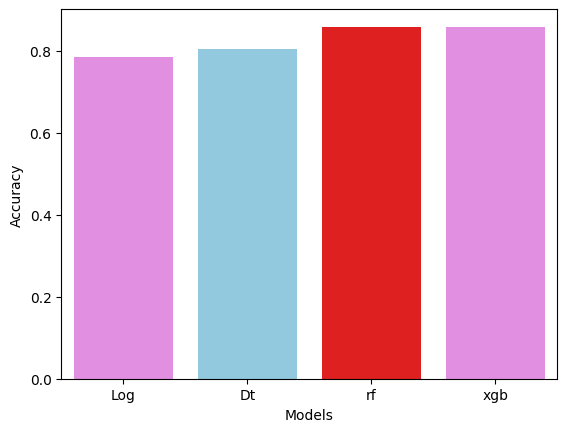

In [ ]:
import seaborn as sns
sns.barplot(x='Models',y='Accuracy',data=final_data,hue='Models',palette=['violet', 'skyblue', 'red'],legend=False)

<ipython-input-285-8a3c5457b03a>:1: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Models',y='Precision',data=final_data,hue='Models',palette=['yellow', 'blue', 'pink'],legend=False)


<Axes: xlabel='Models', ylabel='Precision'>

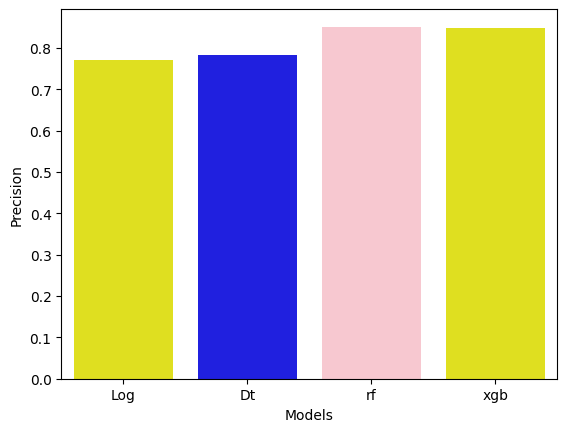

In [ ]:
sns.barplot(x='Models',y='Precision',data=final_data,hue='Models',palette=['yellow', 'blue', 'pink'],legend=False)

**Predict The Model using random forest**

In [ ]:
import joblib
joblib.dump(rf,'Churn_predict_model')

['Churn_predict_model']

In [ ]:
model=joblib.load('Churn_predict_model')
model

RandomForestClassifier()

In [ ]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5702,585,36,7,0,2,1,0,94283,0,0,1
3667,525,33,4,131023,2,0,0,55072,1,0,1
1617,557,40,4,0,2,0,1,105433,0,1,0
5673,639,34,5,139393,2,0,0,33950,0,1,1
4272,640,34,3,77826,1,1,1,168544,0,1,0


In [ ]:
X_test.iloc[1005]

,2730
CreditScore,670
Age,30
Tenure,3
Balance,133446
NumOfProducts,1
HasCrCard,0
IsActiveMember,0
EstimatedSalary,3154
Geography_Germany,0
Geography_Spain,1


In [ ]:
y_test.iloc[1804]

0

In [ ]:
# prediction based on unseen data
new_data = pd.DataFrame([[653,31,9,143319,1,1,0,83679,1,0,1]],columns=X_train_res.columns)
model.predict(new_data)

array([0])

In [ ]:
# Get the features for the nth row
model.predict(X_test.iloc[[100]])

array([0])


**Predict The Model using XGBOOST**

In [ ]:
y_test_res.value_counts()

,count
Exited,
0,1633
1,1553


In [ ]:
# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test_res)
y_pred_xgb

array([0, 1, 0, ..., 1, 1, 0])